In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

## Считываем данные

In [3]:
# Берем данные отсюда: https://github.com/Laggg/data--for--students
# сначала считываем 2 строчки, чтобы понять разделитель колонок (по умолчанию разделитель - ",")
# в данном случае - разделитель колонок - символ ";"
pd.read_csv('data/beauty.csv', nrows=2)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


In [4]:
df = pd.read_csv('data/beauty.csv', sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Наглядная схема по названием параметров

## Строим некоторые виды графиков

1) Обычный график, построенный по точкам. На вход может подаваться как лист, так и массив, серия значений.
Возможно использовать следующие параметры:
- linewidth ширина линии, соединяющей соседние точки
- color цвет линии
- marker вид точкек, которые соединяются линиями
- linestyle стиль линии (сплошная, прерывистая, точка-тире и т.д.)
- label подпись на легенде

Приведем пример графика с некоторыми параметрами, которые можно изменять. Все комбинации параметров смотрите в официальной документации https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

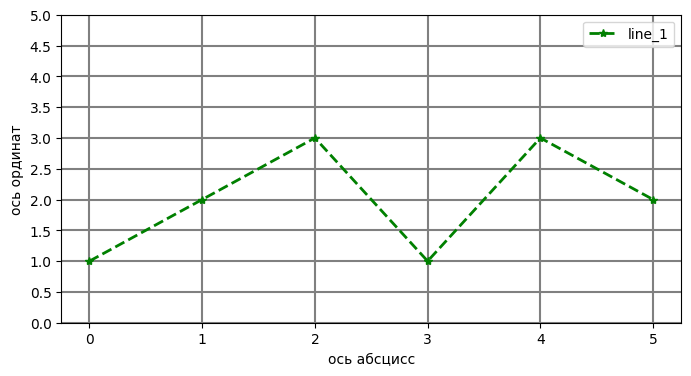

In [5]:
x = [1,2,3,1,3,2]
x = np.array([1,2,3,1,3,2])
x = pd.Series(np.array([1,2,3,1,3,2]))

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.plot(x, linewidth=2, color='green', marker='*', linestyle='dashed', label='line_1')
plt.legend() # показывать легенду
plt.grid(color='gray', linestyle='-', linewidth=1.5) # включить отрисовку сетки c определенными параметрами
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) # можно явно указать, как подписывать ось
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');

2) Другой пример - scatter (где точки не соединяются прямыми линиями), с указанием точек (x1,y1),(x2,y2),(x3,y3)...

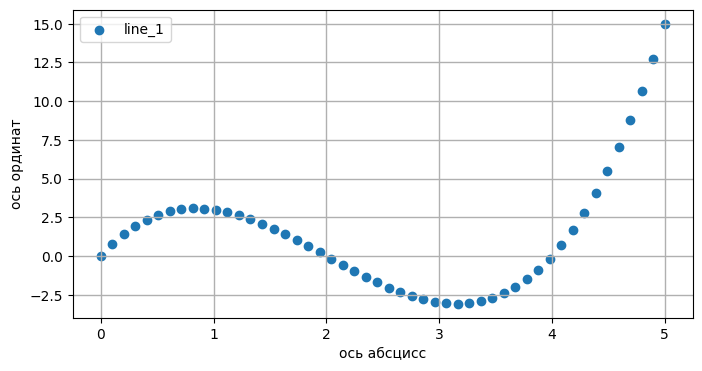

In [6]:
x = np.linspace(0, 5, 50) # создаем массив из 100 чисел float от 0 до 5 с равномернов шагом
y = x*(x - 2)*(x - 4)

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.scatter(x, y, label='line_1')
plt.legend() # показывать легенду
plt.grid(linewidth=1) # включить отрисовку сетки c определенными параметрами
plt.yticks()
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');

2) Гистограмма - график, показывающий распределение какой-либо величины, встречающуюся в данном объеме значений. По другому, график показыват сколько раз встречается из выборки каждое значение в ней. Построим гистограммы с помощью разных библиотек.

Один из главных параметров bins  - обратная величина к ширине столбцов на графике

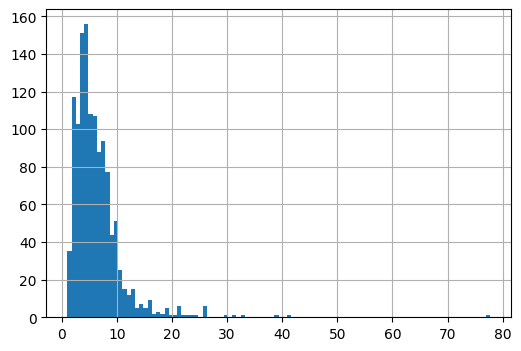

In [7]:
df['wage'].hist(figsize=(6, 4), bins=100);

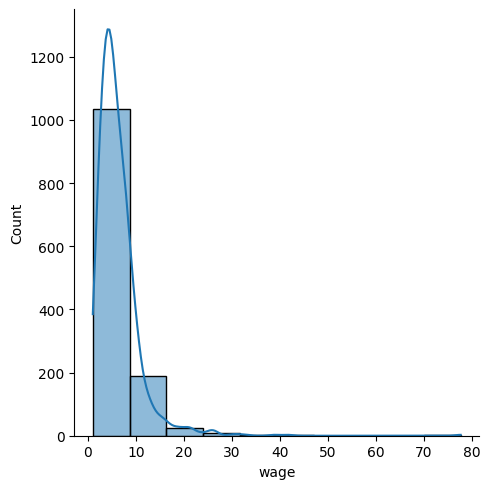

In [14]:
sns.displot(df['wage'], bins=10, kde=True);

Можно сразу построить несколько гистограмм, относящихся к разным столбцам данных:

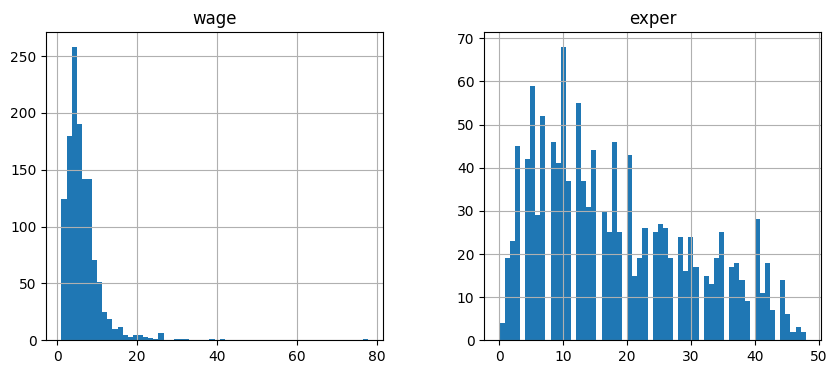

In [15]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4), bins=60);

3) CountPlot - столбчатая диаграмма, чаще всего используется для категориальных признаков в данных. Показывает, сколько трочек в df имеют каждое из выбранного значения категориального признака.

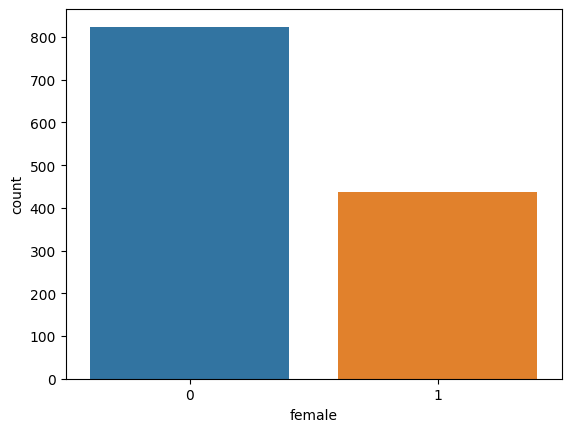

In [16]:
sns.countplot(x='female', data=df);

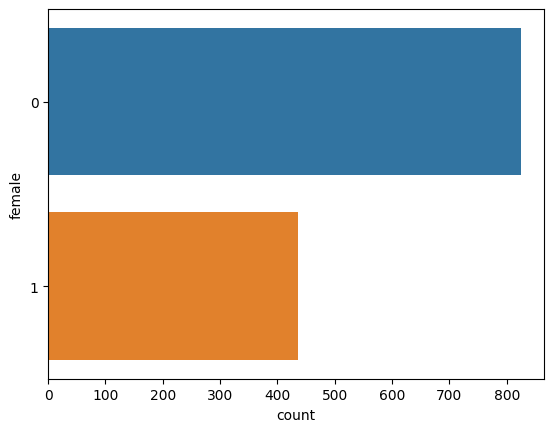

In [17]:
sns.countplot(y='female', data=df);

Приведем пример для столбца look относительно параметра female в DataFrame df

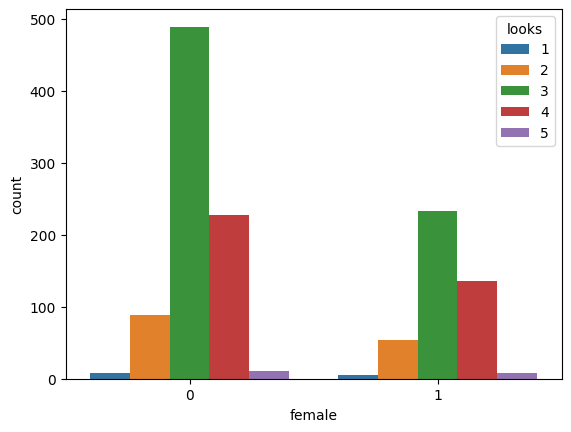

In [18]:
sns.countplot(x='female', hue='looks', data=df);

На следующем примере покажем, как нарисовать несколько графиков на одной картинке:
axes - части графика. axes[0] - левая часть, а axes[1] - правая.
Аналогично можно создать сетку 2х2 для 4х графиков (но для 4х графиков нужно указывать уже 2 координаты, например, ax=axis[1][1]).

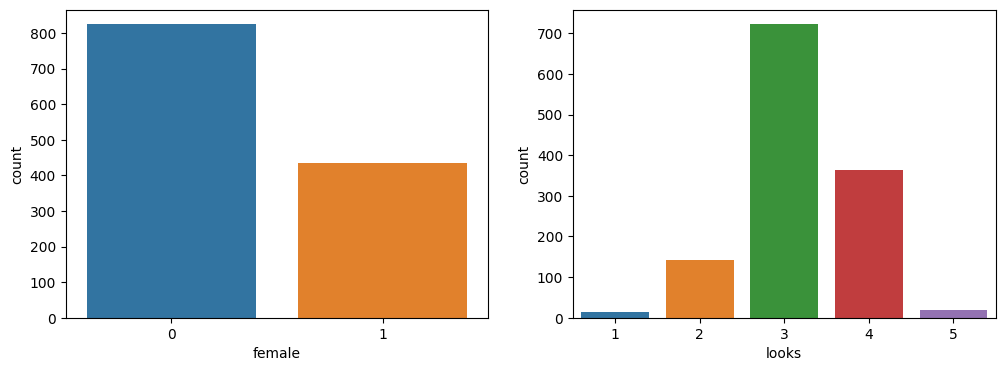

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[0]);
sns.countplot(x='looks', data=df, ax=axes[1]);

3) Круговая диаграмма отлично показывает соотношение частей:

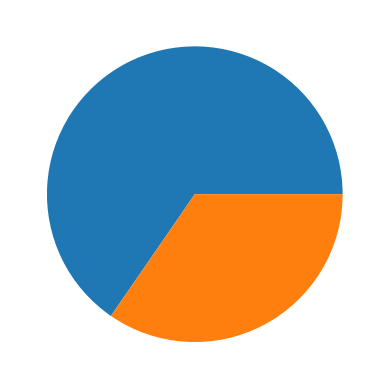

In [20]:
plt.pie(df.groupby('female')['wage'].count()); # круговая диаграмми (pie)

5) Ящик с усами, или boxplot
Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили.

Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах.

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

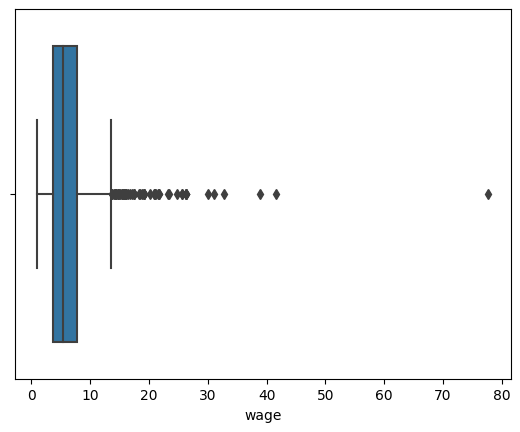

In [21]:
sns.boxplot(x='wage', data=df);

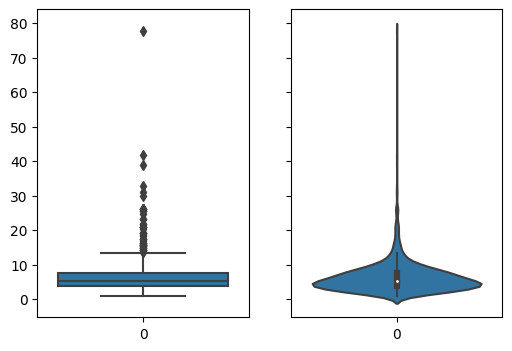

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0]);
sns.violinplot(data=df['wage'], ax=axes[1]);

Для большего понимания посмотреть на картинку из Wikipedia:

6) joint plot: Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой wage и exper.

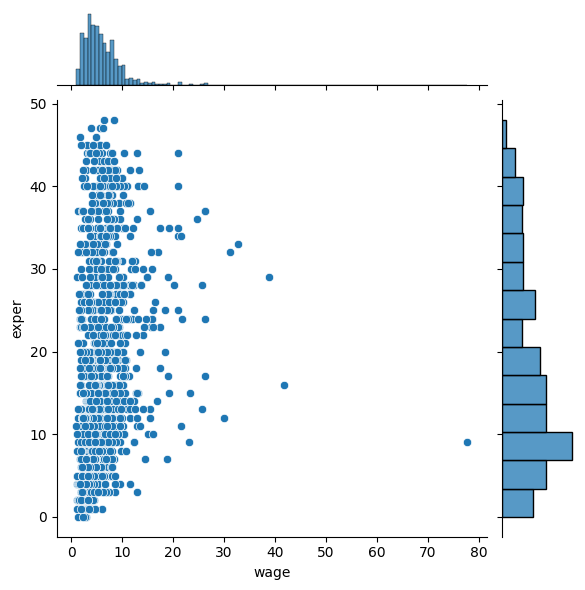

In [24]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter');

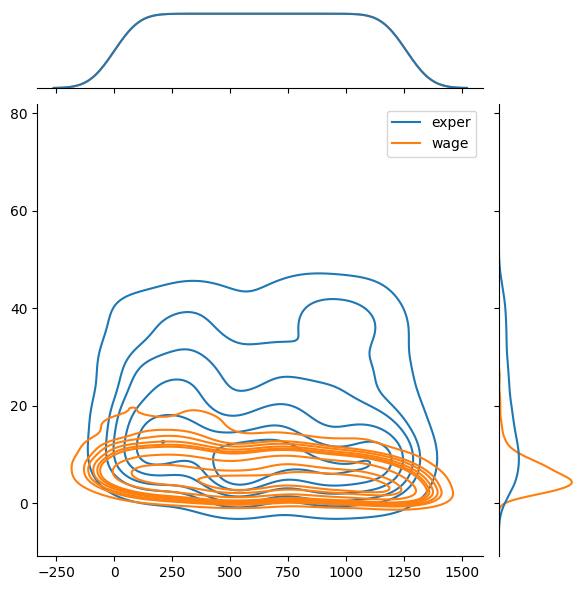

In [29]:
sns.jointplot(data=df[['exper', 'wage',]], kind="kde", color="r");

После всего вышесказанного, нужно отметить, что можно делать некоторые операции над DataFrame, и уже к ним применять метод .plot(...)

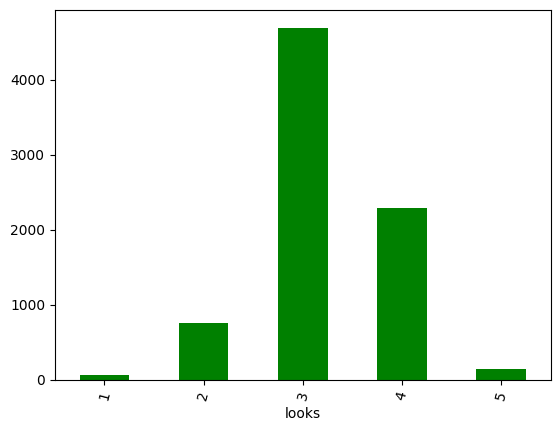

In [30]:
df.groupby('looks').wage.sum().plot(kind='bar', rot=75, color='green');

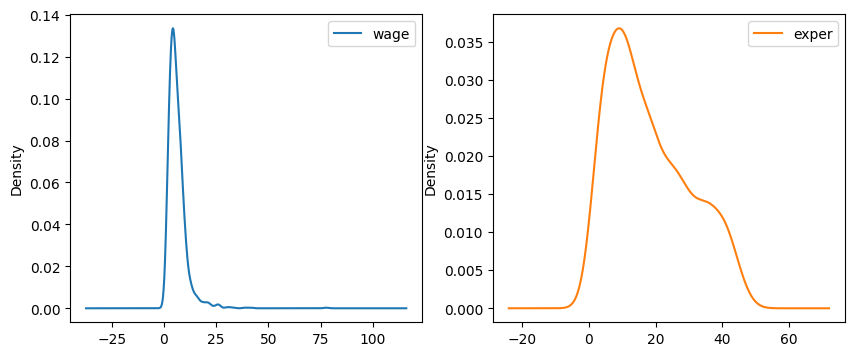

In [31]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

## 3D графики

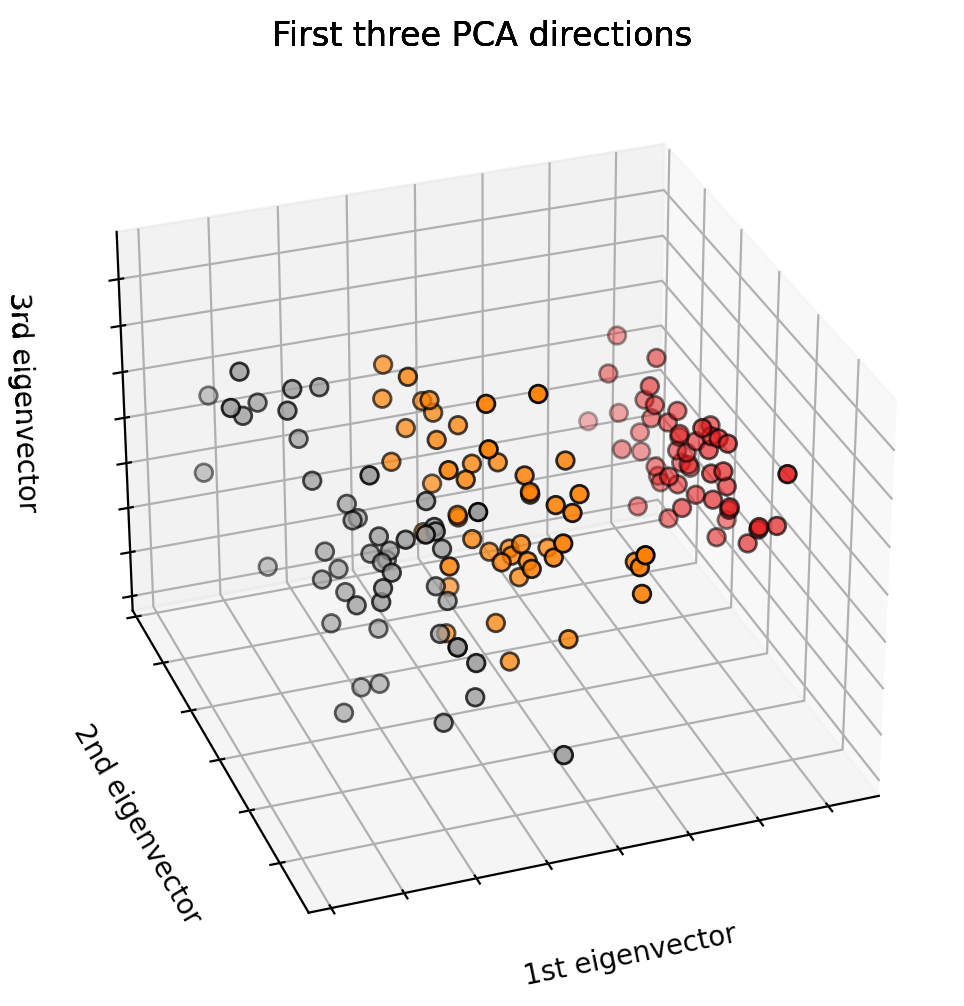

In [39]:
from sklearn import datasets
from sklearn.decomposition import PCA
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
X_reduced = PCA(n_components=3).fit_transform(iris.data)


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(elev=-150, azim=110, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()

## Создание анимации

Покажемсоздание анимации на примере построения разделябщей прямой между данными: https://hsto.org/webt/h7/vn/dt/h7vndtkzlinfkyoqzpcmjxecubu.gif из статьи про SVM https://habr.com/ru/company/ods/blog/484148/

MovieWriter imagemagick unavailable; using Pillow instead.


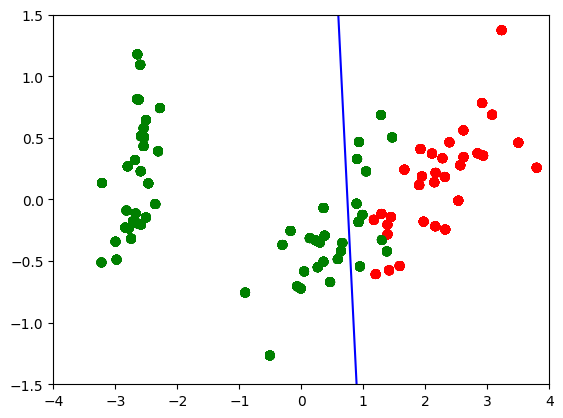

In [40]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import matplotlib.lines as mlines

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l


def one_image(w, X, Y): # фунцкия отрисовки одного кадра
    axes = plt.gca()
    axes.set_xlim([-4,4])
    axes.set_ylim([-1.5,1.5])
    d1 = {-1:'green', 1:'red'}
    im = plt.scatter(X[:,0], X[:,1], c=[d1[y] for y in Y])
    im = newline([0,-w[2]/w[1]],[-w[2]/w[0],0], 'blue')
    return im


# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

history_w = np.array([[ 1.40100620e-02,  3.82414425e-02,  9.29992169e-03],
       [ 9.34759319e-02,  1.38405275e-02, -2.07000784e-02],
       [ 1.77059209e-01,  2.08938874e-02, -5.07000782e-02],
       [ 2.57582976e-01,  1.13119698e-02, -8.07000777e-02],
       [ 2.57845336e-01,  3.30044268e-02, -1.10700077e-01],
       [ 2.48875308e-01,  4.34713607e-02, -1.40700076e-01],
       [ 2.10330535e-01,  2.29165461e-02, -1.70700074e-01],
       [ 2.88030722e-01,  1.60452308e-02, -2.00700073e-01],
       [ 3.65670311e-01,  6.38421381e-04, -2.30700071e-01],
       [ 4.22698556e-01,  4.13726013e-03, -2.00700068e-01],
       [ 3.91374597e-01, -2.71359690e-03, -2.30700066e-01],
       [ 4.56157722e-01, -9.23192424e-03, -2.00700064e-01],
       [ 4.56157718e-01, -9.23192415e-03, -2.00700062e-01],
       [ 4.56157713e-01, -9.23192405e-03, -2.00700060e-01],
       [ 5.15303640e-01, -1.46237611e-02, -1.70700058e-01],
       [ 5.15303635e-01, -1.46237609e-02, -1.70700056e-01],
       [ 5.15303630e-01, -1.46237608e-02, -1.70700055e-01],
       [ 5.15303625e-01, -1.46237607e-02, -1.70700053e-01],
       [ 5.15303619e-01, -1.46237605e-02, -1.70700051e-01],
       [ 5.51273647e-01, -3.28065062e-02, -1.40700049e-01],
       [ 5.51273642e-01, -3.28065059e-02, -1.40700048e-01],
       [ 5.51273636e-01, -3.28065055e-02, -1.40700047e-01],
       [ 5.66508857e-01,  5.17263051e-03, -1.70700045e-01],
       [ 5.66508852e-01,  5.17263046e-03, -1.70700044e-01],
       [ 5.66508846e-01,  5.17263040e-03, -1.70700042e-01],
       [ 5.66508840e-01,  5.17263035e-03, -1.70700040e-01],
       [ 5.48868641e-01,  1.97012529e-02, -2.00700038e-01],
       [ 5.48868636e-01,  1.97012527e-02, -2.00700036e-01],
       [ 5.48868630e-01,  1.97012525e-02, -2.00700034e-01],
       [ 5.54086386e-01,  2.73468786e-02, -2.30700032e-01],
       [ 5.96543457e-01,  1.00993879e-02, -2.00700030e-01],
       [ 5.96543451e-01,  1.00993878e-02, -2.00700028e-01],
       [ 5.96543445e-01,  1.00993877e-02, -2.00700026e-01],
       [ 6.38206423e-01,  3.96740775e-03, -1.70700024e-01],
       [ 6.38206417e-01,  3.96740771e-03, -1.70700022e-01],
       [ 6.11201179e-01, -5.88772655e-03, -2.00700021e-01],
       [ 6.52906839e-01, -1.43675546e-02, -1.70700019e-01],
       [ 6.52906832e-01, -1.43675545e-02, -1.70700017e-01],
       [ 6.52906826e-01, -1.43675543e-02, -1.70700015e-01],
       [ 6.42197374e-01,  7.79748602e-04, -2.00700014e-01],
       [ 6.03251852e-01,  1.06133678e-02, -2.30700012e-01],
       [ 6.03251846e-01,  1.06133677e-02, -2.30700009e-01],
       [ 6.05295634e-01,  3.17685316e-02, -2.60700007e-01],
       [ 6.05295628e-01,  3.17685313e-02, -2.60700004e-01],
       [ 6.05295622e-01,  3.17685310e-02, -2.60700002e-01],
       [ 5.85487103e-01,  4.23576206e-02, -2.90699999e-01],
       [ 5.85487097e-01,  4.23576202e-02, -2.90699996e-01],
       [ 5.57651268e-01,  2.83422349e-02, -3.20699993e-01],
       [ 5.53558401e-01,  3.77632078e-02, -3.50699990e-01],
       [ 5.12157603e-01,  5.03918360e-02, -3.80699987e-01]])


fig = plt.figure()
ims = [] # набиваем в этот список кадры с помощью цикла
for i in range(50):
    im = one_image(history_w[i], X_train, Y_train)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, # используем волшебную команду
                                repeat_delay=500)
writer = PillowWriter(fps=20) # устанавливаем фпс

ani.save("my_demo.gif", writer='imagemagick') # сохраняем

# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

2) для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси):

    - доля всех задержек ко всем вылетам
    - найти зависимость количества задержек от длины пути, который предстоит пролететь самолету
    - топ 5 направлений, для которых чаще всего происходят задержки
    - в какие времена года чаще всего происходят задержки рейсов
    - найти топ 10 самых хороших перевозчиков, которые реще всего задерживают свои рейсы
    - найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
    - найти необычную зависимость количества задержек от имеющихся данных

In [48]:
import pandas as pd
df = pd.read_csv('data/flight_delays.csv')
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [118]:
# Сразу отфильтруем только те строки, где есть задержка
delayed = df[df.dep_delayed_15min == 'Y'].copy().reset_index(drop=True)
delayed.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
1,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
2,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
3,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
4,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
5,c-5,c-6,c-5,1728,WN,SAN,SMF,480,Y
6,c-10,c-20,c-5,2312,AQ,OAK,LAS,407,Y
7,c-9,c-9,c-6,1520,YV,SEA,PHX,1107,Y
8,c-9,c-5,c-2,1831,FL,ATL,MSP,906,Y
9,c-6,c-6,c-2,1932,UA,DEN,DTW,1123,Y


## Очень полезные ссылки:

- https://habr.com/ru/post/468295/
- https://habr.com/ru/company/ods/blog/323210/

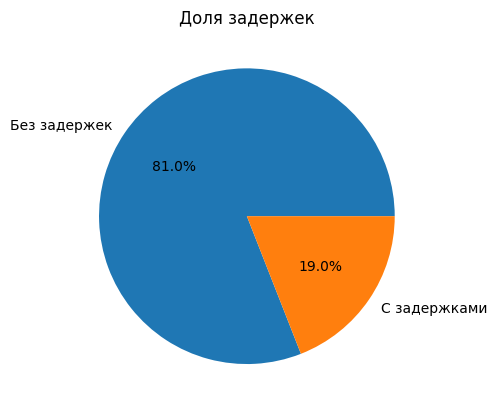

In [132]:
# Доля всех задержек ко всем вылетам
plt.pie(df['dep_delayed_15min'].value_counts(), labels=['Без задержек', 'С задержками'], autopct='%1.1f%%');
plt.title('Доля задержек');

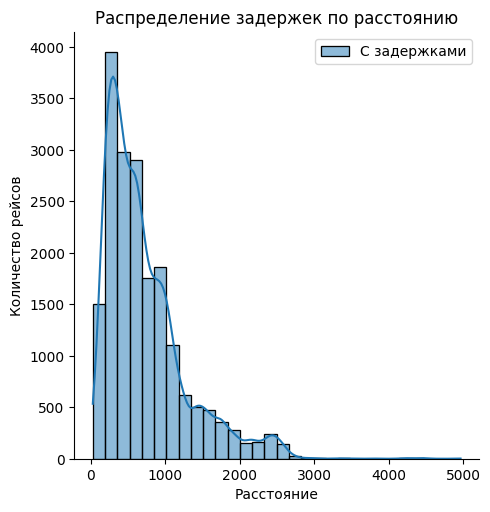

In [133]:
# найти зависимость количества задержек от длины пути, который предстоит пролететь самолету
sns.displot(delayed["Distance"], bins=30, kde=True, label="С задержками")
plt.xlabel("Расстояние")
plt.ylabel("Количество рейсов")
plt.legend()
plt.title("Распределение задержек по расстоянию")
plt.show()

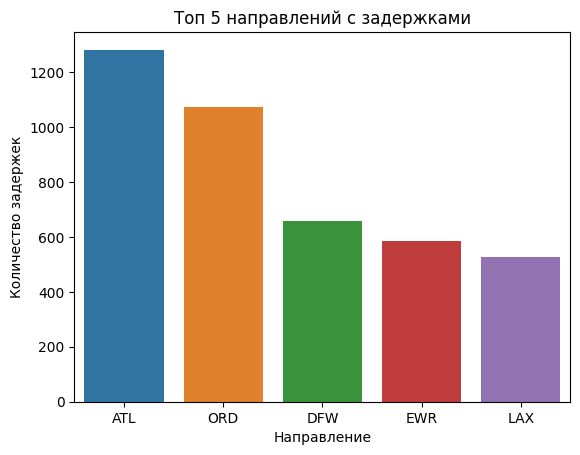

In [134]:
# топ 5 направлений, для которых чаще всего происходят задержки
sns.countplot(data=delayed, order=delayed["Dest"].value_counts().head(5).index, x="Dest")
plt.xlabel("Направление")
plt.ylabel("Количество задержек")
plt.title("Топ 5 направлений с задержками")
plt.show()

In [125]:
# Объединим месяцы в группы по временам года
def get_season(month):
    month = month.lower()
    season = {
        "c-1": "Зима",
        "c-2": "Зима",
        "c-3": "Весна",
        "c-4": "Весна",
        "c-5": "Весна",
        "c-6": "Лето",
        "c-7": "Лето",
        "c-8": "Лето",
        "c-9": "Осень",
        "c-10": "Осень",
        "c-11": "Осень",
        "c-12": "Зима"
    }
    return season[month]

delayed["Season"] = delayed["Month"].apply(get_season)
delayed.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Season
0,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,Осень
1,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y,Осень
2,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y,Лето
3,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y,Зима
4,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y,Весна
5,c-5,c-6,c-5,1728,WN,SAN,SMF,480,Y,Весна
6,c-10,c-20,c-5,2312,AQ,OAK,LAS,407,Y,Осень
7,c-9,c-9,c-6,1520,YV,SEA,PHX,1107,Y,Осень
8,c-9,c-5,c-2,1831,FL,ATL,MSP,906,Y,Осень
9,c-6,c-6,c-2,1932,UA,DEN,DTW,1123,Y,Лето


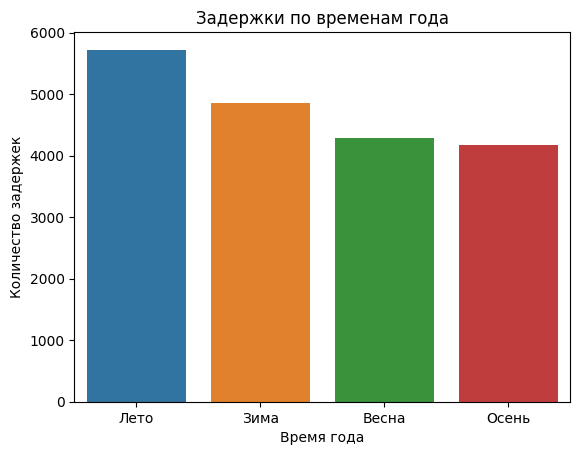

In [135]:
# в какие времена года чаще всего происходят задержки рейсов
sns.countplot(data=delayed, order=delayed["Season"].value_counts().index, x="Season")
plt.xlabel("Время года")
plt.ylabel("Количество задержек")
plt.title("Задержки по временам года")
plt.show()

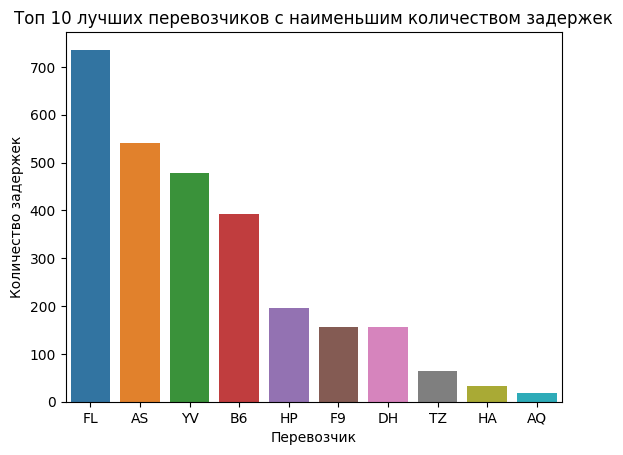

In [137]:
# найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
sns.countplot(data=delayed, order=delayed["UniqueCarrier"].value_counts().tail(10).index, x="UniqueCarrier")
plt.xlabel("Перевозчик")
plt.ylabel("Количество задержек")
plt.title("Топ 10 лучших перевозчиков с наименьшим количеством задержек")
plt.show()

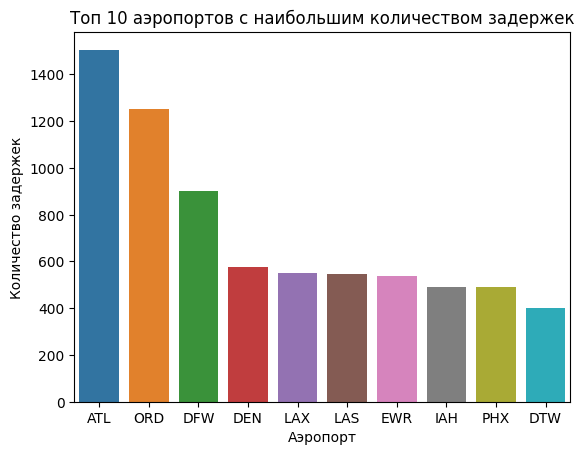

In [138]:
# найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
sns.countplot(data=delayed, order=delayed["Origin"].value_counts().head(10).index, x="Origin")
plt.xlabel("Аэропорт")
plt.ylabel("Количество задержек")
plt.title("Топ 10 аэропортов с наибольшим количеством задержек")
plt.show()

<Axes: xlabel='DepTime'>

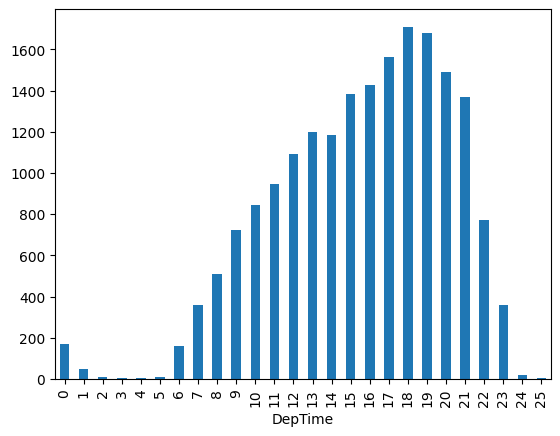

In [188]:
# найти необычную зависимость количества задержек от имеющихся данных
# Посмотрим на зависимость зад# Усредним количество задержек по времени суток и построим гистограмму по часам
delayed.groupby(delayed["DepTime"] // 100).count()["dep_delayed_15min"].plot(kind="bar")

Видим, что ближе к 18 вечера количество задержек обычно увеличивается. 

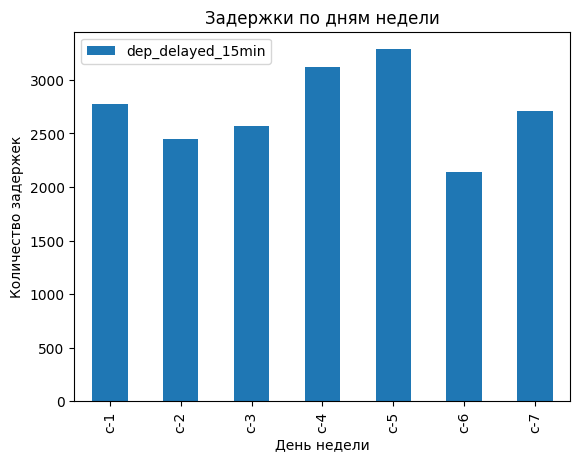

In [155]:
# Количество задержек в каждый день недели – с понедельника по воскресенье, 
# колонки расставлены по порядку дня недели

delayed.groupby("DayOfWeek").count().plot(kind="bar", y="dep_delayed_15min")
plt.xlabel("День недели")
plt.ylabel("Количество задержек")
plt.title("Задержки по дням недели")
plt.show()

Видим, что по пятницам обычно больше всего задержек, видимо пилоты любят проводить время в барах.